In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

from keras.models import Sequential
from keras.layers import Dense

print("Packages Imported Successfully!")

Packages Imported Successfully!


In [2]:
trainData = pd.read_csv("/content/Training.csv")
trainData = trainData.drop("Unnamed: 133", axis = 1)

In [3]:
trainData["prognosis"].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [4]:
testData = pd.read_csv("/content/Testing.csv")

In [5]:
xTrain = trainData.drop("prognosis", axis = 1)
yTrain = trainData["prognosis"]
yTrain = np.array(yTrain).reshape(yTrain.shape[0], 1)

In [6]:
xTest = testData.drop("prognosis", axis = 1)
yTest = testData["prognosis"]
yTest = np.array(yTest).reshape(yTest.shape[0], 1)

In [7]:
print("xTrain: {}\nyTrain: {}\nxTest: {}\nyTest: {}\n".format(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape))

xTrain: (4920, 132)
yTrain: (4920, 1)
xTest: (42, 132)
yTest: (42, 1)



In [8]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(xTrain, yTrain)
predictions = DecisionTree.predict(xTest)
accuracy = DecisionTree.score(xTest, yTest)

In [9]:
for i in range(len(predictions)):
    print("Pred: {}\nReal: {}\n\n".format(predictions[i], yTest[i][0]))

Pred: Fungal infection
Real: Fungal infection


Pred: Allergy
Real: Allergy


Pred: GERD
Real: GERD


Pred: Chronic cholestasis
Real: Chronic cholestasis


Pred: Drug Reaction
Real: Drug Reaction


Pred: Peptic ulcer diseae
Real: Peptic ulcer diseae


Pred: AIDS
Real: AIDS


Pred: Diabetes 
Real: Diabetes 


Pred: Gastroenteritis
Real: Gastroenteritis


Pred: Bronchial Asthma
Real: Bronchial Asthma


Pred: Hypertension 
Real: Hypertension 


Pred: Migraine
Real: Migraine


Pred: Cervical spondylosis
Real: Cervical spondylosis


Pred: Paralysis (brain hemorrhage)
Real: Paralysis (brain hemorrhage)


Pred: Jaundice
Real: Jaundice


Pred: Malaria
Real: Malaria


Pred: Chicken pox
Real: Chicken pox


Pred: Dengue
Real: Dengue


Pred: Typhoid
Real: Typhoid


Pred: hepatitis A
Real: hepatitis A


Pred: Hepatitis B
Real: Hepatitis B


Pred: Hepatitis C
Real: Hepatitis C


Pred: Hepatitis D
Real: Hepatitis D


Pred: Hepatitis E
Real: Hepatitis E


Pred: Alcoholic hepatitis
Real: Alcoholic hepa

In [10]:
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 97.62%


In [11]:
print(classification_report(yTest, predictions))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [12]:
featuresImportant = pd.DataFrame(DecisionTree.feature_importances_ * 100, xTrain.columns, columns = ["Importance"])
featuresImportant = featuresImportant.sort_values(by = "Importance", ascending = False)
print(featuresImportant)

                                Importance
high_fever                        4.552171
yellowing_of_eyes                 3.646366
receiving_unsterile_injections    2.500000
slurred_speech                    2.500000
brittle_nails                     2.500000
...                                    ...
runny_nose                        0.000000
sinus_pressure                    0.000000
redness_of_eyes                   0.000000
blurred_and_distorted_vision      0.000000
yellow_crust_ooze                 0.000000

[132 rows x 1 columns]


In [13]:
featuresZeroes = np.array(featuresImportant[featuresImportant["Importance"] == 0.000000].index)
featuresZeroes

array(['pus_filled_pimples', 'small_dents_in_nails', 'loss_of_smell',
       'palpitations', 'bladder_discomfort', 'foul_smell_of urine',
       'prominent_veins_on_calf', 'blood_in_sputum',
       'red_sore_around_nose', 'polyuria', 'internal_itching',
       'toxic_look_(typhos)', 'watering_from_eyes',
       'history_of_alcohol_consumption', 'depression',
       'distention_of_abdomen', 'irritability', 'coma',
       'receiving_blood_transfusion', 'belly_pain', 'visual_disturbances',
       'inflammatory_nails', 'bruising', 'spinning_movements',
       'sunken_eyes', 'acute_liver_failure', 'yellow_urine', 'mild_fever',
       'abdominal_pain', 'back_pain', 'loss_of_appetite', 'nausea',
       'sweating', 'breathlessness', 'irregular_sugar_level',
       'swelling_of_stomach', 'lethargy', 'restlessness', 'mood_swings',
       'cold_hands_and_feets', 'anxiety', 'weight_gain', 'muscle_wasting',
       'joint_pain', 'continuous_sneezing', 'fluid_overload',
       'swelled_lymph_nodes', 

In [14]:
trainData = trainData.drop(columns = featuresZeroes, axis = 1)
testData = testData.drop(columns = featuresZeroes, axis = 1)

In [15]:
xTrain = trainData.drop("prognosis", axis = 1)
yTrain = trainData["prognosis"]
xTest = testData.drop("prognosis", axis = 1)
yTest = testData["prognosis"]

In [16]:
print("xTrain: {}\nyTrain: {}\nxTest: {}\nyTest: {}\n".format(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape))

xTrain: (4920, 62)
yTrain: (4920,)
xTest: (42, 62)
yTest: (42,)



In [17]:
yTrainEncoded = pd.get_dummies(yTrain)
yTestEncoded = pd.get_dummies(yTest)
yTestEncoded.shape

(42, 41)

In [18]:
model = Sequential()
model.add(Dense(32, input_dim = xTrain.shape[1], activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(yTrainEncoded.shape[1], activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2016      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 41)                697       
                                                                 
Total params: 3241 (12.66 KB)
Trainable params: 3241 (12.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [20]:
history = model.fit(xTrain, yTrainEncoded, batch_size = 120, epochs = 30, validation_split = 0.3)

Epoch 1/30
29/29 [==============================] - 3s 11ms/step - loss: 0.6736 - accuracy: 0.0424 - val_loss: 0.6364 - val_accuracy: 0.0488
Epoch 2/30
29/29 [==============================] - 0s 6ms/step - loss: 0.5775 - accuracy: 0.0325 - val_loss: 0.4771 - val_accuracy: 0.0244
Epoch 3/30
29/29 [==============================] - 0s 6ms/step - loss: 0.3626 - accuracy: 0.0244 - val_loss: 0.2279 - val_accuracy: 0.0244
Epoch 4/30
29/29 [==============================] - 0s 5ms/step - loss: 0.1796 - accuracy: 0.0244 - val_loss: 0.1403 - val_accuracy: 0.0244
Epoch 5/30
29/29 [==============================] - 0s 5ms/step - loss: 0.1347 - accuracy: 0.0244 - val_loss: 0.1260 - val_accuracy: 0.0244
Epoch 6/30
29/29 [==============================] - 0s 5ms/step - loss: 0.1238 - accuracy: 0.0244 - val_loss: 0.1181 - val_accuracy: 0.0244
Epoch 7/30
29/29 [==============================] - 0s 6ms/step - loss: 0.1171 - accuracy: 0.0441 - val_loss: 0.1121 - val_accuracy: 0.0488
Epoch 8/30
29/29 [=

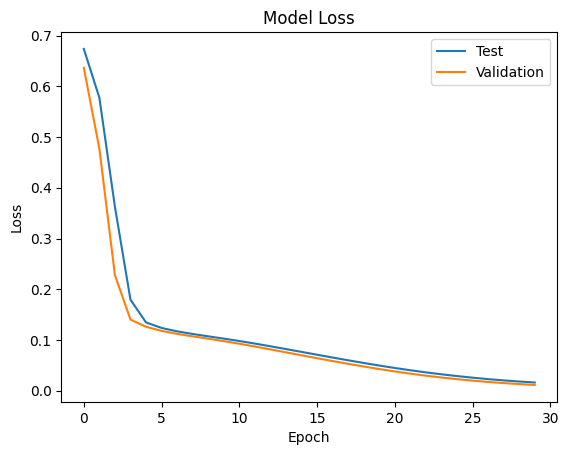

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

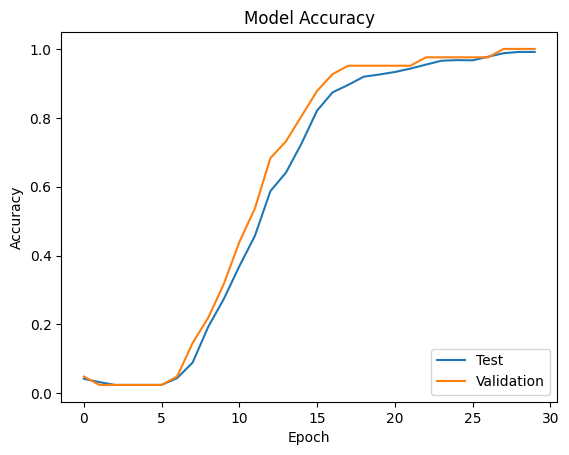

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

In [23]:
score = model.evaluate(xTest, yTestEncoded, steps = 5, batch_size = 1, verbose = 2)

5/5 - 0s - loss: 0.0099 - accuracy: 1.0000 - 67ms/epoch - 13ms/step


In [24]:
print("Loss: {}\nAccuracy: {}%\n".format(score[0], score[1]*100))

Loss: 0.009905447252094746
Accuracy: 100.0%



In [26]:
model.save('my_model.keras')